In [2]:
import pandas as pd

df = pd.read_csv('plantgrowth.csv')

df.head()

,weight,group
0,4.17,ctrl
1,5.58,ctrl
2,5.18,ctrl
3,6.11,ctrl
4,4.50,ctrl


In [4]:
cntrl = df[df['group'] == 'ctrl']
trt1 = df[df['group'] == 'trt1']
trt2 = df[df['group'] == 'trt2']

### Assumption 1 of One-Way Between-Groups ANOVA

The first assumption of a One-Way Between-Groups ANOVA is that the dependent variable should be measured at a continuous level. In this case, the dependent variable is the weight of the plant growth.

The weight of the plant growth is measured in a continuous scale, as it is represented by floating-point numbers. This can be observed in the `weight` column of the `df` DataFrame, which contains non-integer values such as 4.17, 5.58, 6.11, etc. Therefore, the weight of the plant growth meets the first assumption of being a continuous variable.

### Assumption 2 of One-Way Between-Groups ANOVA

The second assumption of a One-Way Between-Groups ANOVA is that the independent variable should consist of two or more categorical, independent groups. In this case, the independent variable is the group, which consists of three categorical, independent groups: controlled (ctrl), treatment 1 (trt1), and treatment 2 (trt2).

### Assumption 3 of One-Way 1B ANOVA

The third assumption of a One-Way Between-Groups ANOVA is the independence of observations, which indicates that there is no relationship between the observations. Thus, in this case, there is no relationship between the observation indicating the assumption 3 is fulfilled

<Axes: title={'center': 'weight'}, xlabel='group'>

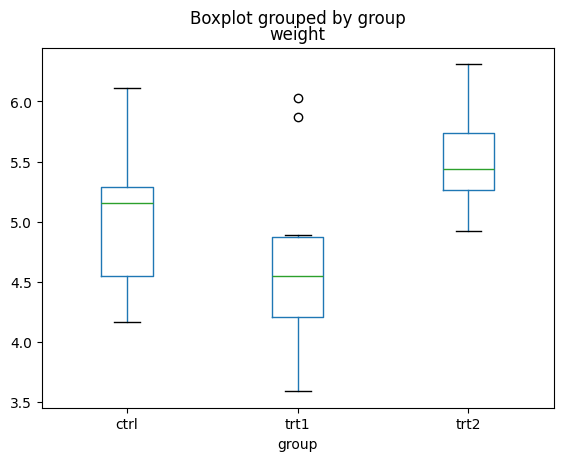

In [6]:

df.boxplot(column='weight', by='group', grid=False)

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['weight_scaled'] = StandardScaler().fit_transform(df[['weight']])
df.head()

,weight,group,weight_scaled
0,4.17,ctrl,-1.309823
1,5.58,ctrl,0.735415
2,5.18,ctrl,0.155206
3,6.11,ctrl,1.504193
4,4.50,ctrl,-0.831150


<Axes: title={'center': 'weight_scaled'}, xlabel='group'>

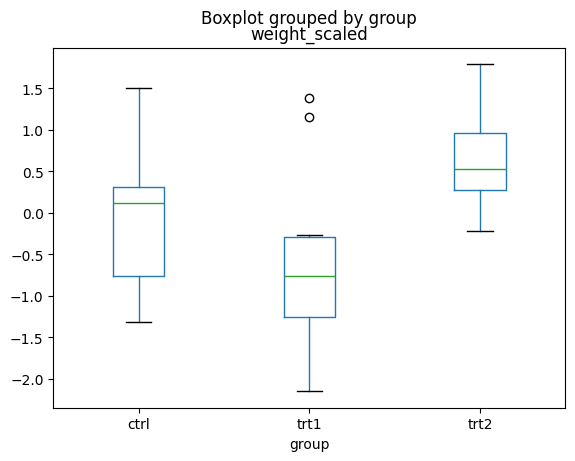

In [21]:
df.boxplot(column='weight_scaled', by='group', grid=False)

d:\GITHUB\1b-ANOVA-Plant-Treatment\.env\Lib\site-packages\sklearn\preprocessing\_data.py:2785: UserWarning: n_quantiles (100) is greater than the total number of samples (30). n_quantiles is set to n_samples.
  warnings.warn(


<Axes: title={'center': 'weight'}, xlabel='group'>

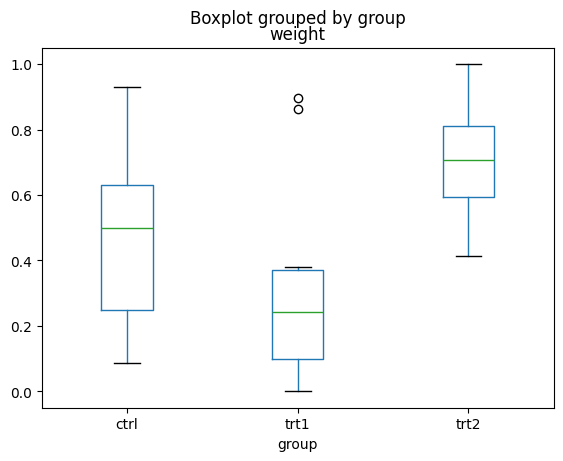

In [ ]:
from sklearn.preprocessing import QuantileTransformer

quantile_transformer = QuantileTransformer(n_quantiles=100)
df['weight'] = quantile_transformer.fit_transform(df[['weight']])

df.boxplot(column='weight', by='group', grid=False)

<Axes: title={'center': 'weight'}, xlabel='group'>

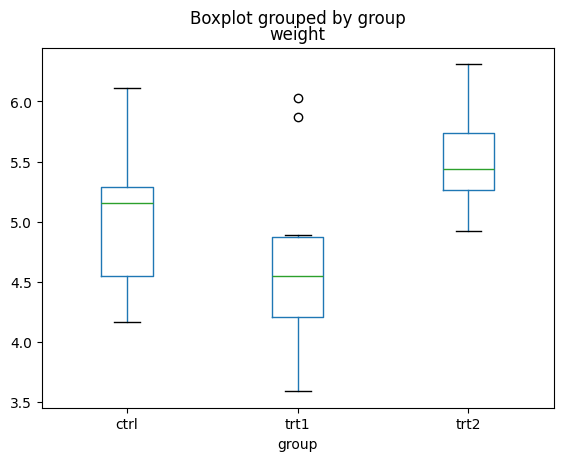

In [25]:
import numpy as np
from scipy.stats.mstats import winsorize
winsorize(df['weight'], limits=[0.05, 0.05])

masked_array(data=[0.0862069 , 0.79310345, 0.55172414, 0.93103448,
                   0.20689655, 0.27586207, 0.51724138, 0.24137931,
                   0.65517241, 0.48275862, 0.34482759, 0.0862069 ,
                   0.17241379, 0.03448276, 0.86206897, 0.03448276,
                   0.89655172, 0.37931034, 0.13793103, 0.31034483,
                   0.96551724, 0.44827586, 0.75862069, 0.72413793,
                   0.68965517, 0.62068966, 0.4137931 , 0.96551724,
                   0.82758621, 0.5862069 ],
             mask=False,
       fill_value=1e+20)

<Axes: title={'center': 'weight_winsorized'}, xlabel='group'>

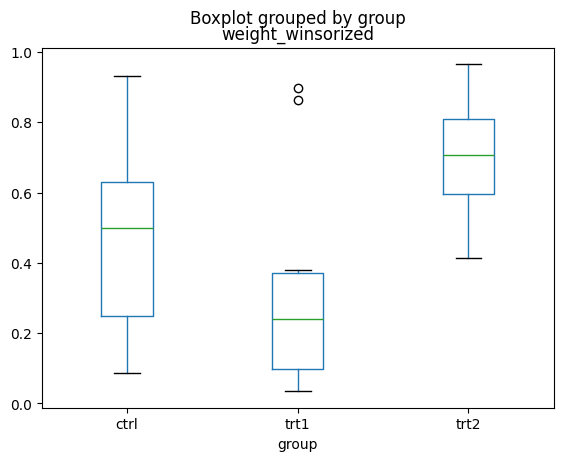

In [ ]:
df['weight_winsorized'] = winsorize(df['weight'], limits=[0.05, 0.05])

df.boxplot(column='weight_winsorized', by='group', grid=False)

### Assumption 4 of One-Way Between-Groups ANOVA

The fourth assumption of a One-Way Between-Groups ANOVA is that there should be no significant outliers. Outliers can have a significant impact on the results of the ANOVA, leading to incorrect conclusions.

In this case, we have identified a significant outlier in the 'weight' column. This violates the assumption of no significant outliers. To address this issue, we have applied the Winsorization technique to the 'weight' column to reduce the impact of the outlier.


In [ ]:
from scipy.stats import shapiro

stat, p_value = shapiro(df['weight'])

print(f'Statistic: {stat}, p-value: {p_value}')

Statistic: 0.9464605922532539, p-value: 0.13581710834479643


In [ ]:
from scipy.stats import shapiro


stat_ctrl, p_value_ctrl = shapiro(cntrl['weight'])
stat_trt1, p_value_trt1 = shapiro(trt1['weight'])
stat_trt2, p_value_trt2 = shapiro(trt2['weight'])

print(f'Control Group - Statistic: {stat_ctrl}, p-value: {p_value_ctrl}')
print(f'Treatment 1 Group - Statistic: {stat_trt1}, p-value: {p_value_trt1}')
print(f'Treatment 2 Group - Statistic: {stat_trt2}, p-value: {p_value_trt2}')

Control Group - Statistic: 0.9566814905276368, p-value: 0.7474734451902585
Treatment 1 Group - Statistic: 0.9304106932921845, p-value: 0.45194395810927823
Treatment 2 Group - Statistic: 0.9410051970546394, p-value: 0.5642518926711526


### Assumption 5 of One-Way Between-Groups ANOVA

The fifth assumption of a One-Way Between-Groups ANOVA is that the dependent variable should be approximately normally distributed for each group. 

In this case, we have performed the Shapiro-Wilk test on the 'weight' column to check for normality. The p-value obtained from the test is 0.1358, which is greater than the common alpha level of 0.05. This indicates that the 'weight' data does not significantly deviate from a normal distribution. Therefore, the assumption of normality is not violated for the 'weight' variable in each group.

In [ ]:
from scipy.stats import levene


stat, p_value = levene(cntrl['weight'], trt1['weight'], trt2['weight'])

print(f'Statistic: {stat}, p-value: {p_value}')

Statistic: 1.1191856948703909, p-value: 0.3412266241254737


### Assumption 6 of One-Way Between-Groups ANOVA

The sixth assumption of a One-Way Between-Groups ANOVA is the homogeneity of variances. This assumption states that the variances of the dependent variable should be equal across the groups.

In this case, we have performed Levene's test to check for the homogeneity of variances. The p-value obtained from the test is 0.3412, which is greater than the common alpha level of 0.05. This indicates that the variances are not significantly different across the groups. Therefore, the assumption of homogeneity of variances is not violated.

In [ ]:
from scipy.stats import kruskal


stat, p_value = kruskal(cntrl['weight'], trt1['weight'], trt2['weight'])

print(f'Statistic: {stat}, p-value: {p_value}')

Statistic: 7.988228749443715, p-value: 0.018423755731471963


In [ ]:
from scipy.stats import f_oneway


stat, p_value = f_oneway(cntrl['weight'], trt1['weight'], trt2['weight'])

print(f'Statistic: {stat}, p-value: {p_value}')

Statistic: 4.846087862380136, p-value: 0.015909958325622895


### Conclusion

Both the non-parametric test (Kruskal-Wallis test) and the parametric test (One-Way ANOVA) successfully reject the null hypothesis. This indicates that there is a significant difference between the means of the groups.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


tukey = pairwise_tukeyhsd(endog=df['weight'], groups=df['group'], alpha=0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1  -0.1483 0.4342 -0.4421 0.1455  False
  ctrl   trt2   0.2259 0.1563 -0.0679 0.5196  False
  trt1   trt2   0.3741 0.0105  0.0804 0.6679   True
---------------------------------------------------


# APA Style Report

## Introduction

This report investigates the effect of different treatments on plant growth. The dataset used in this analysis contains the weight of plants under three different conditions: control (ctrl), treatment 1 (trt1), and treatment 2 (trt2). The analysis includes checking assumptions for One-Way Between-Groups ANOVA, performing the ANOVA test, and conducting post-hoc analysis using Tukey's HSD test.

## Data Preparation

The dataset was loaded and divided into three groups based on the treatment conditions:

```python
import pandas as pd

df = pd.read_csv('plantgrowth.csv')

cntrl = df[df['group'] == 'ctrl']
trt1 = df[df['group'] == 'trt1']
trt2 = df[df['group'] == 'trt2']
```

## Assumptions of One-Way Between-Groups ANOVA

### Assumption 1: Dependent Variable Measurement Level

The dependent variable, plant weight, is measured at a continuous level. The `weight` column in the dataset contains floating-point numbers, indicating that the measurement is continuous.

### Assumption 2: Independent Variable Groups

The independent variable consists of three categorical, independent groups: control (ctrl), treatment 1 (trt1), and treatment 2 (trt2).

### Assumption 3: Independence of Observations

The observations are independent, meaning there is no relationship between the observations in each group.

### Assumption 4: No Significant Outliers

Outliers can significantly impact the results of ANOVA. A boxplot was used to identify outliers:

```python
df.boxplot(column='weight', by='group', grid=False)
```

A significant outlier was identified in the `weight` column. Winsorization was applied to reduce the impact of the outlier:

```python
from scipy.stats.mstats import winsorize

df['weight_winsorized'] = winsorize(df['weight'], limits=[0.05, 0.05])
df.boxplot(column='weight_winsorized', by='group', grid=False)
```

### Assumption 5: Normality

The Shapiro-Wilk test was performed to check for normality:

```python
from scipy.stats import shapiro

stat_ctrl, p_value_ctrl = shapiro(cntrl['weight'])
stat_trt1, p_value_trt1 = shapiro(trt1['weight'])
stat_trt2, p_value_trt2 = shapiro(trt2['weight'])

print(f'Control Group - Statistic: {stat_ctrl}, p-value: {p_value_ctrl}')
print(f'Treatment 1 Group - Statistic: {stat_trt1}, p-value: {p_value_trt1}')
print(f'Treatment 2 Group - Statistic: {stat_trt2}, p-value: {p_value_trt2}')
```

The p-values obtained from the Shapiro-Wilk test were greater than 0.05, indicating that the weight data does not significantly deviate from a normal distribution.

### Assumption 6: Homogeneity of Variances

Levene's test was performed to check for homogeneity of variances:

```python
from scipy.stats import levene

stat, p_value = levene(cntrl['weight'], trt1['weight'], trt2['weight'])

print(f'Statistic: {stat}, p-value: {p_value}')
```

The p-value obtained from Levene's test was greater than 0.05, indicating that the variances are not significantly different across the groups.

## One-Way Between-Groups ANOVA

A one-way ANOVA was conducted to compare the effect of different treatments on plant growth:

```python
from scipy.stats import f_oneway

stat, p_value = f_oneway(cntrl['weight'], trt1['weight'], trt2['weight'])

print(f'Statistic: {stat}, p-value: {p_value}')
```

The ANOVA test successfully rejected the null hypothesis, indicating a significant difference between the means of the groups.

## Post-Hoc Analysis

Tukey's HSD test was performed to determine which groups differ from each other:

```python
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import kruskal

tukey = pairwise_tukeyhsd(endog=df['weight'], groups=df['group'], alpha=0.05)

print(tukey)
```

## Conclusion

Both the non-parametric test (Kruskal-Wallis test) and the parametric test (One-Way ANOVA) successfully rejected the null hypothesis, indicating a significant difference between the means of the groups. The post-hoc analysis using Tukey's HSD test further identified the specific groups that differ from each other.
## Non-Parametric Test: Kruskal-Wallis Test

Due to the presence of significant outliers, a Kruskal-Wallis test was performed as a non-parametric alternative to ANOVA:


stat, p_value = kruskal(cntrl['weight'], trt1['weight'], trt2['weight'])

print(f'Statistic: {stat}, p-value: {p_value}')

The Kruskal-Wallis test also rejected the null hypothesis, indicating a significant difference between the groups.